In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu', name = 'Hidden_Layer_1'),
    Dense(16, activation='relu', name = 'Hidden_Layer_2'),
    Dense(10, activation='softmax')
])


In [4]:
# Print the model summary
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 16)                12560     
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 16)                272       
_________________________________________________________________
dense (Dense)                (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16,(3,3),activation='relu', input_shape = (28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10,activation='softmax')
])

In [7]:
# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [19]:
# Define the model optimizer, loss function and metrics

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
             loss = 'sparse_categorical_crossentropy',
             metrics = [acc, mae])

In [20]:
# Print the resulting model attributes

print(model.loss)
print ('\n')
print(model.optimizer)
print ('\n')
print(model.metrics)
print ('\n')
print(model.optimizer.lr)

sparse_categorical_crossentropy




[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x7f5ef8230e48>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7f5ef8230eb8>]


<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [21]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [22]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [23]:
# Print the shape of the training data
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [24]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [25]:
print(train_labels[0])

9


In [26]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images  = test_images / 255.

In [27]:
train_images.shape

(60000, 28, 28)

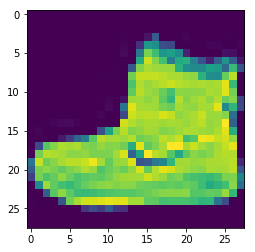

In [28]:
# Display one of the images

img = train_images[0]
plt.imshow(img)
plt.show()


#### Fit the model

In [29]:
# Fit the model

history = model.fit(train_images[...,np.newaxis],train_labels,epochs=2,
                                 batch_size=256)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 57s 953us/sample - loss: 0.5435 - sparse_categorical_accuracy: 0.8130 - mean_absolute_error: 4.4200 - loss: 0.5656 - sparse_categorical_accuracy: 0.806
Epoch 2/2
60000/60000 [==============================] - 55s 922us/sample - loss: 0.3557 - sparse_categorical_accuracy: 0.8744 - mean_absolute_error: 4.4200s - loss: 0.3613 - sparse_categorical_accuracy: 0.8726 - mean_ - ETA: 12s - loss: 0.3605 - sparse_categorical_accuracy: 0.8729 - me - ETA: 9s - loss: 0.3582 - sparse_categorical_accur


#### Plot training history

In [31]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.543468,0.812983,4.420001
1,0.355688,0.874417,4.420001


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

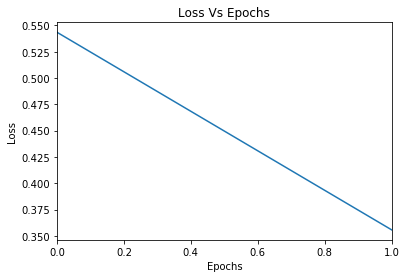

In [35]:
# Make a plot for the loss

loss_plot = df.plot(y = "loss", title = "Loss Vs Epochs", legend =False)
loss_plot.set(xlabel = "Epochs", ylabel = "Loss")

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

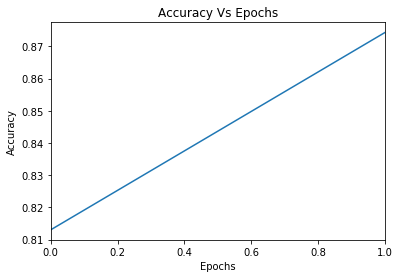

In [36]:
# Make a plot for the accuracy

acc_plot = df.plot(y = 'sparse_categorical_accuracy', title = 'Accuracy Vs Epochs', legend= False)
acc_plot.set(xlabel = "Epochs", ylabel = 'Accuracy')

[Text(0, 0.5, 'MAE'), Text(0.5, 0, 'Epochs')]

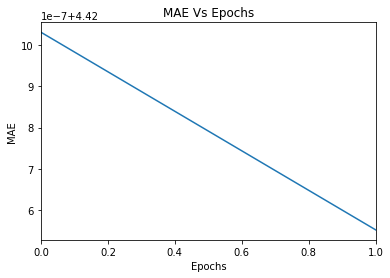

In [37]:
# Make a plot for the additional metric

mae_plot = df.plot(y='mean_absolute_error', title = 'MAE Vs Epochs', legend = False)
mae_plot.set(xlabel = 'Epochs', ylabel = 'MAE')

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [38]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [44]:
# Evaluate the model
print (test_images.shape)
print (test_labels.shape)

loss, accuracy, mae = model.evaluate(test_images[...,np.newaxis], test_labels, verbose=2)

(10000, 28, 28)
(10000,)
10000/1 - 5s - loss: 0.3636 - sparse_categorical_accuracy: 0.8558 - mean_absolute_error: 4.4200


#### Make predictions from the model

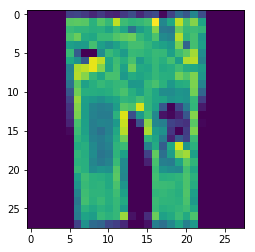

Label: Trouser


In [52]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [54]:
# Get the model predictions

pred = model.predict(test_image[np.newaxis,...,np.newaxis])

In [55]:
print (f"Model Prediction: {labels[np.argmax(pred)]}")

Model Prediction: Trouser
